![Canada](http://localhost:8888/tree/Pratica%20Python/Python/Sesi%C3%B3n%203/Flag_of_Canada_(Pantone).svg.png)


#  Datos



Conjunto de datos: Inmigración a Canada desde 1980 a 2013.



### Contexto Empresarial 

<br>

<p>Canadá ha experimentado un aumento en número de inmigrantes durante los ultimos tiempos. Quieren saber el numero de inmigrantes. Para ello han contratado un equipo para poder determinar si se trata de al estacional durante el tiempo o solo un patrón aislado.</p>

### Problema Comercial

<p> Proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente</p>

### Contexto Analítico

¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?<br>
Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?<br>
¿Hay más accidentes entre semana que durante los fines de semana?<br>
¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?<br>
Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?<br>
¿Cuáles son las 5 principales causas de accidentes en la ciudad?<br>
¿Qué tipos de vehículos están más involucrados en accidentes por municipio?<br>
¿Qué tipos de vehículos están más involucrados en las muertes?<br>


# Presentación y objetivos del modelo

 <center> <h3>Inmigración en Canada entre los años 1980 - 2013 - Abstrac</h3> </center>
<br>
<br>

<p>Este analsis se centra en poder determinar porque Canadá, durante la década de los 70 en adelante se produjo una masiva migración hacia sus tierra, producto de sus políticas migratoria. Segun afirma Barragán(2020) en su analisis <em>"fue definitiva para consolidarse como una nación pionera en la adopción del multiculturalismo como política de Estado. Para tal fin, en 1973 se creó en “Ottawa el Ministerio de Multiculturalismo y, en 1988 esta idea se convirtió en principio básico del Estado a través de la Ley de Multiculturalismo</em>.(p.60),lo cual produjo durante estos periodos un alto nivel de inmigración.</p> <p> Que insta a interpretar la constitución canadiense desde ese marco teórico y a promoverlo activamente”. Así que en cuanto a leyes y en instituciones que materializan esta normatividad, Canadá presenta una evolución la cual se reafirma y se reajusta con el paso de los años y las situaciones que tienen que enfrentar.</p>
<p> Como asi tambien ver que otra variable a analizar es como afirma, Ocampo (2009) Tras dos décadas caracterizadas por el recrudecimiento de las crisis monetarias y financieras y un crecimiento mediocre y volátil, América Latina ha experimentado en los años 2000 un fuerte dinamismo de la actividad económica y ha reducido su vulnerabilidad financiera. Esto ha permitido que la región resista bien frente a la crisis económica internacional desatada en 2007, que la afectó más por el canal comercial que a través del canal financiero.</p>

<p>¿Cómo influyo las políticas migratorias la inmigración hacia Canadá durante los años 1980 - 2013?</p>
<p>¿Cómo influyo las crisis economicas latinoamericanas la inmigración hacia Canadá durante los años 1980 - 2013?</p>


# Librerias, descarga y preparación de datos


In [1]:
!pip install openpyxl

In [2]:
import numpy as np  # util para computación científica en Python
import pandas as pd # biblioteca que contienen la estructura de datos de uso principal
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
import seaborn as sns

In [17]:
df_can = pd.read_excel(
    'datos/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

## Analisis preliminar con Pandas Profiling - Exploratory Data Analysis (EDA)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_can)
prof.to_file(output_file='output.html')

In [15]:
# dimensión del Dataframe (rows, columns)
df_can.shape   

(195, 43)

In [16]:
# Infomación sobre los datos
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [29]:
# Verifica si hay nulos
df_can.notnull()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [18]:
# Resumen estadístico
df_can.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000
mean,912.764,1249.015,901.754,508.395,566.990,534.723,387.436,376.497,358.862,441.272,691.133,714.390,843.241,964.379,1064.149,1136.856,1138.713,993.154,962.626,1026.077,989.154,824.241,922.144,1111.344,1244.323,1144.159,1114.344,1190.169,1320.292,1266.959,1191.821,1246.395,1275.733,1420.287,1262.533,1313.959,1320.703
std,13.083,1185.527,0.432,1949.589,2152.644,1866.998,1204.334,1198.246,1079.310,1225.577,2109.206,2443.607,2555.049,3158.730,2952.094,3330.084,3495.220,3613.336,3091.492,3321.045,3070.761,2385.944,2887.633,3664.042,3961.621,3660.580,3623.510,3710.505,4425.958,3926.718,3443.542,3694.574,3829.630,4462.946,4030.084,4247.555,4237.952
min,903.000,905.000,901.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,903.000,914.000,902.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.500,1.000,1.000,2.000,3.000,6.500,11.500,9.500,10.500,14.500,19.500,15.000,16.000,16.000,22.000,18.500,21.500,19.000,28.500,25.000,31.000,31.000,36.000,40.500,37.500,42.500,45.000
50%,908.000,922.000,902.000,13.000,10.000,11.000,12.000,13.000,17.000,18.000,26.000,34.000,44.000,38.000,51.000,74.000,85.000,76.000,91.000,118.000,114.000,106.000,116.000,138.000,169.000,165.000,161.000,191.000,210.000,218.000,198.000,205.000,214.000,211.000,179.000,233.000,213.000
75%,922.000,925.500,902.000,251.500,295.500,275.000,173.000,181.000,197.000,254.000,434.000,409.000,508.500,612.500,657.500,655.000,722.500,545.000,550.500,603.500,612.500,535.500,548.500,659.000,793.500,686.000,673.500,756.500,832.000,842.000,899.000,934.500,888.000,932.000,772.000,783.000,796.000
max,935.000,5501.000,902.000,22045.000,24796.000,20620.000,10015.000,10170.000,9564.000,9470.000,21337.000,27359.000,23795.000,31668.000,23380.000,34123.000,33720.000,39231.000,30145.000,29322.000,22965.000,21049.000,30069.000,35529.000,36434.000,31961.000,36439.000,36619.000,42584.000,33848.000,28742.000,30037.000,29622.000,38617.000,36765.000,34315.000,34129.000


In [26]:
# Primeros datos del Dataframe
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [27]:
# Ultimos datos del Dataframe
df_can.tail(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [28]:
# Muestra las columnas que conforman el Dataframe
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

#### Eliminar las columnas que no son informativas para la visualización (Typo, REG, Converage).

In [30]:
df_can.drop(['DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,OdName,AREA,AreaName,REG,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


#### Renombrar las columnas

In [31]:
df_can.rename(columns={'OdName':'Country',"AREA":"Cod_continet", 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Country,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [32]:
df_can.columns = list(map(str, df_can.columns))

# comprobar el tipo de las etiquetas de las columnas
all(isinstance(column, str) for column in df_can.columns)

True

#### Establecer el nombre del país como índice. Esto es útil para buscar rápidamente países utilizando el método .loc.


In [33]:
df_can.set_index('Country', inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [34]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,65075
Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,17532
Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,71254
American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1872
Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,1848


In [35]:
print('Dimensión de los datos:', df_can.shape)

Dimensión de los datos: (195, 40)


<h2>Arbol de Decisión</h2>

In [14]:
df_can.columns

Index(['Country', 'Cod_continet', 'Continent', 'REG', 'Region', 'DevName',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [15]:
X3 = df_can[['Cod_continet','Continent', 'REG',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013',]].values
X3[0:5]

array([[935, 'Asia', 5501, 16, 39, 39, 47, 71, 340, 496, 741, 828, 1076,
        1028, 1378, 1170, 713, 858, 1537, 2212, 2555, 1999, 2395, 3326,
        4067, 3697, 3479, 2978, 3436, 3009, 2652, 2111, 1746, 1758, 2203,
        2635, 2004],
       [908, 'Europe', 925, 1, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 21, 56, 96,
        71, 63, 113, 307, 574, 1264, 1816, 1602, 1021, 853, 1450, 1223,
        856, 702, 560, 716, 561, 539, 620, 603],
       [903, 'Africa', 912, 80, 67, 71, 69, 63, 44, 69, 132, 242, 434,
        491, 872, 795, 717, 595, 1106, 2054, 1842, 2292, 2389, 2867,
        3418, 3406, 3072, 3616, 3626, 4807, 3623, 4005, 5393, 4752, 4325,
        3774, 4331],
       [909, 'Oceania', 957, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [908, 'Europe', 925, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0,
        0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]],
      dtype=object)

In [16]:
df_can[["Continent"]].values

array([['Asia'],
       ['Europe'],
       ['Africa'],
       ['Oceania'],
       ['Europe'],
       ['Africa'],
       ['Latin America and the Caribbean'],
       ['Latin America and the Caribbean'],
       ['Asia'],
       ['Oceania'],
       ['Europe'],
       ['Asia'],
       ['Latin America and the Caribbean'],
       ['Asia'],
       ['Asia'],
       ['Latin America and the Caribbean'],
       ['Europe'],
       ['Europe'],
       ['Latin America and the Caribbean'],
       ['Africa'],
       ['Asia'],
       ['Latin America and the Caribbean'],
       ['Europe'],
       ['Africa'],
       ['Latin America and the Caribbean'],
       ['Asia'],
       ['Europe'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Asia'],
       ['Africa'],
       ['Northern America'],
       ['Africa'],
       ['Africa'],
       ['Latin America and the Caribbean'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Latin America and the Caribbean'],
       ['Africa'],
      

In [17]:
df_can[["Region"]].values

array([['Southern Asia'],
       ['Southern Europe'],
       ['Northern Africa'],
       ['Polynesia'],
       ['Southern Europe'],
       ['Middle Africa'],
       ['Caribbean'],
       ['South America'],
       ['Western Asia'],
       ['Australia and New Zealand'],
       ['Western Europe'],
       ['Western Asia'],
       ['Caribbean'],
       ['Western Asia'],
       ['Southern Asia'],
       ['Caribbean'],
       ['Eastern Europe'],
       ['Western Europe'],
       ['Central America'],
       ['Western Africa'],
       ['Southern Asia'],
       ['South America'],
       ['Southern Europe'],
       ['Southern Africa'],
       ['South America'],
       ['South-Eastern Asia'],
       ['Eastern Europe'],
       ['Western Africa'],
       ['Eastern Africa'],
       ['Western Africa'],
       ['South-Eastern Asia'],
       ['Middle Africa'],
       ['Northern America'],
       ['Middle Africa'],
       ['Middle Africa'],
       ['South America'],
       ['Eastern Asia'],
       ['East

In [18]:
df_can[["DevName"]].values


array([['Developing regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developed regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developed regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developed regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Developing regions'],
       ['Develop

In [19]:
codificador_etiqueta_Continent = preprocessing.LabelEncoder()
codificador_etiqueta_Continent.fit(['Asia','Europe','Northern America','Latin America and the Caribbean','Africa','Oceania'])
X3[:,1] = codificador_etiqueta_Continent.transform(X3[:,1]) 


X3[0:5]

array([[935, 1, 5501, 16, 39, 39, 47, 71, 340, 496, 741, 828, 1076, 1028,
        1378, 1170, 713, 858, 1537, 2212, 2555, 1999, 2395, 3326, 4067,
        3697, 3479, 2978, 3436, 3009, 2652, 2111, 1746, 1758, 2203, 2635,
        2004],
       [908, 2, 925, 1, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 21, 56, 96, 71, 63,
        113, 307, 574, 1264, 1816, 1602, 1021, 853, 1450, 1223, 856, 702,
        560, 716, 561, 539, 620, 603],
       [903, 0, 912, 80, 67, 71, 69, 63, 44, 69, 132, 242, 434, 491, 872,
        795, 717, 595, 1106, 2054, 1842, 2292, 2389, 2867, 3418, 3406,
        3072, 3616, 3626, 4807, 3623, 4005, 5393, 4752, 4325, 3774, 4331],
       [909, 5, 957, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [908, 2, 925, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
        0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]], dtype=object)

In [20]:
y3 = df_can["Total"]
y3[0:5]

0    65075
1    17532
2    71254
3     1872
4     1848
Name: Total, dtype: int64

In [21]:
X3_entrena, X3_prueba, y3_entrena, y3_prueba = train_test_split(X3, y3, test_size=0.3, random_state=3)
print ('Conjunto de Entrenamiento set:', X3_entrena.shape,  y3_entrena.shape)
print ('Conjunto de Prueba:', X3_prueba.shape,  y3_prueba.shape)

Conjunto de Entrenamiento set: (136, 37) (136,)
Conjunto de Prueba: (59, 37) (59,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
arbol_modelo = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
arbol_modelo

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [24]:
arbol_modelo.fit(X3_entrena,y3_entrena)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

Una vez entrenado el modelo se puede proceder a realizar algunas predicciones con el conjunto de datos de prueba, las cuales serán almacenadas en una variable llamada `arbol_pronostico`.

In [83]:
arbol_pronostico = arbol_modelo.predict(X3_prueba)
arbol_pronostico

array([  2693,   1944,  71254,   2081,   7698, 110925,  27849,  25665,
         2136,   1817,  19041,   2420,  36949,   7794,   4158,   4842,
        19041,   6745,   1842,  19041,   1938,   1944,   1878,   4842,
         4842,  42384,   1864,   6470,   6745,   3779,   2769,   7698,
         4613,   2574,   4506,   9806,   2107,   5167,   3860,   1864,
         6745,   8369,   8788,  23688,  23194,   4158,   4005,  14068,
         2903,   4289,   2229,  23688,   2107,   3860,  77620,   4005,
        12222,   6621,   4158], dtype=int64)

In [26]:
print (arbol_pronostico [0:5])
print (y3_prueba [0:5])

[ 2693  1944 71254  2081  7698]
34      3467
25      2455
14     72004
102     2049
111    17503
Name: Total, dtype: int64


In [27]:
print("Precición del modelo basado en árbol de decisiones: ", metrics.accuracy_score(y3_prueba, arbol_pronostico))

Precición del modelo basado en árbol de decisiones:  0.0


In [28]:
precision_alternativo = np.sum(np.equal(y3_prueba, arbol_pronostico)) / len(y3_prueba)
precision_alternativo

0.0

In [29]:
df_Cod_continet = df_can["Cod_continet"]

In [77]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

              precision    recall  f1-score   support

        1817       0.00      0.00      0.00       0.0
        1842       0.00      0.00      0.00       0.0
        1848       0.00      0.00      0.00       2.0
        1864       0.00      0.00      0.00       0.0
        1865       0.00      0.00      0.00       1.0
        1872       0.00      0.00      0.00       1.0
        1874       0.00      0.00      0.00       1.0
        1878       0.00      0.00      0.00       0.0
        1900       0.00      0.00      0.00       1.0
        1901       0.00      0.00      0.00       1.0
        1938       0.00      0.00      0.00       0.0
        1944       0.00      0.00      0.00       0.0
        2007       0.00      0.00      0.00       1.0
        2008       0.00      0.00      0.00       1.0
        2014       0.00      0.00      0.00       1.0
        2049       0.00      0.00      0.00       1.0
        2081       0.00      0.00      0.00       0.0
        2107       0.00    

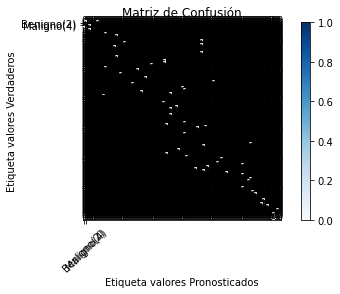

In [87]:
# Calcular matriz de confusión
matriz_confusion = metrics.confusion_matrix(y3_prueba, arbol_pronostico, labels=[2,4])
np.set_printoptions(precision=2)

print (metrics.classification_report(y3_prueba, arbol_pronostico))

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Benigno(2)','Maligno(4)'],normalizar= False,  titulo='Matriz de Confusión')


In [89]:
metrics.jaccard_score(y3_prueba, arbol_pronostico, pos_label=2)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [30]:
df_Cod_continet.head(30)

0     935
1     908
2     903
3     909
4     908
5     903
6     904
7     904
8     935
9     909
10    908
11    935
12    904
13    935
14    935
15    904
16    908
17    908
18    904
19    903
20    935
21    904
22    908
23    903
24    904
25    935
26    908
27    903
28    903
29    903
Name: Cod_continet, dtype: int64

In [31]:
df_total = df_can["Total"]
df_total

0      65075
1      17532
2      71254
3       1872
4       1848
       ...  
190    99001
191     1817
192     4842
193     3490
194    10411
Name: Total, Length: 195, dtype: int64

In [32]:
df_cod_total = pd.concat([df_Cod_continet, df_total], axis=1)


In [33]:
df_cod_total

,Cod_continet,Total
0,935,65075
1,908,17532
2,903,71254
3,909,1872
4,908,1848
...,...,...
190,935,99001
191,903,1817
192,935,4842
193,903,3490


In [34]:
df_continentes =  df_cod_total.groupby('Cod_continet', axis=0).sum()

In [35]:
df_continentes

,Total
Cod_continet,
903,716952
904,825375
905,244762
908,1489745
909,81110
935,3472756


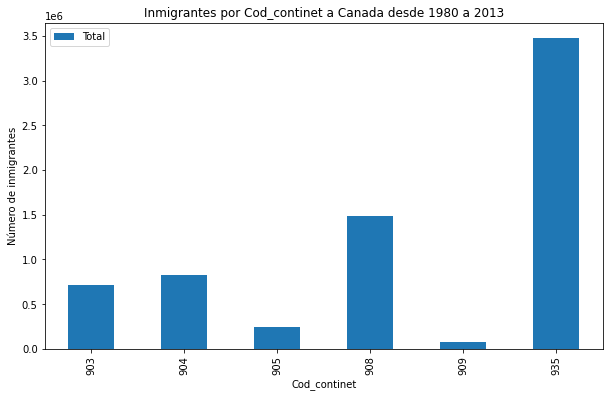

In [36]:
df_continentes.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cod_continet') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes por Cod_continet a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

In [37]:
# Se crea una lista de años desde 1980 - 2013

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Gráfico de Áreas<a id="6"></a>


In [38]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True) #selecciona los valoeres mas altos

# obtener las 5 mejores entradas
df_top5 = df_can.head()

# transponer el dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


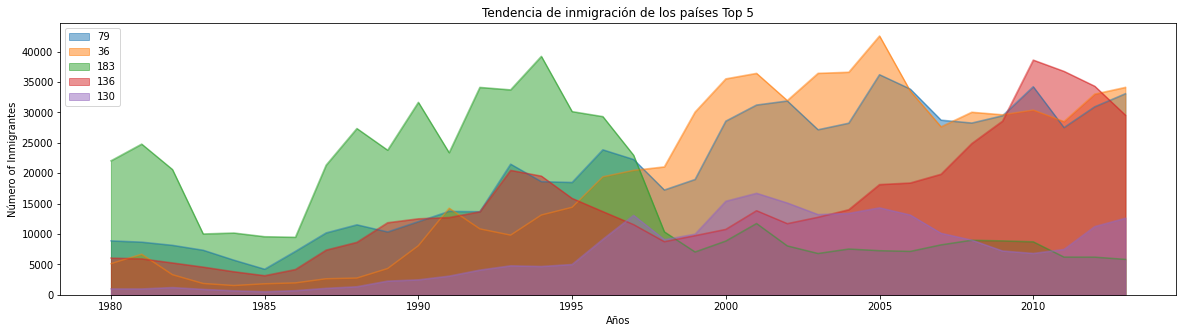

In [39]:
# se cambia los valores de índice de df_top5 para escribir un número entero para graficar
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 5))  # pasa un tamaño en la tupla (x, y)

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

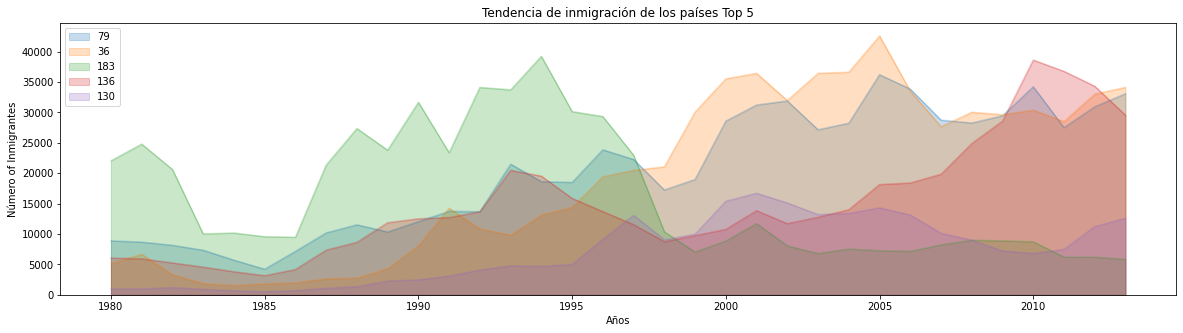

In [40]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, valor por defecto alpha = 0.5
             stacked=False,
             figsize=(20, 5))

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 0, 'Años')

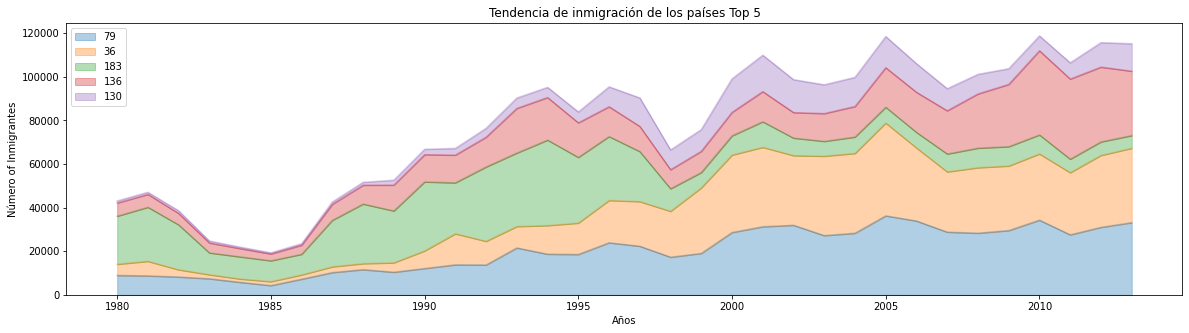

In [41]:
# opción 2: opción preferida con más flexibilidad
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 5))
print(type(ax))

ax.set_title('Tendencia de inmigración de los países Top 5')
ax.set_ylabel('Número of Inmigrantes')
ax.set_xlabel('Años')

# Histogramas<a id="8"></a>



¿Cuál es la distribución de frecuencias del número (población) de nuevos inmigrantes de varios países a Canadá en 2013?

In [42]:
# Vista rápida de los datos de 2013
df_can['2013'].head()

79     33087
36     34129
183     5827
136    29544
130    12603
Name: 2013, dtype: int64

In [43]:
# np.histogram devuelve 2 valores
contador, bordes_contenedores = np.histogram(df_can['2013'])

print(contador) # Contador de frecuencias
print(bordes_contenedores) # rango de contenedores, por defecto = 10 contenedores

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


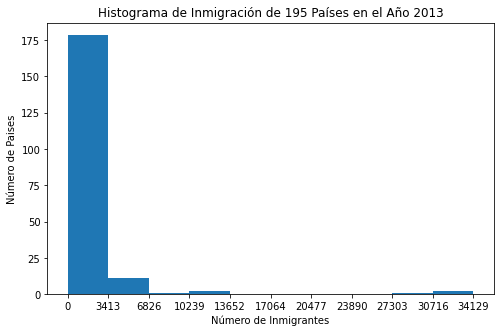

In [44]:
# 'bordes_contenedores' es una lista de intervalos de contenedores
contador, bordes_contenedores = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bordes_contenedores)

plt.title('Histograma de Inmigración de 195 Países en el Año 2013') # agregar un título al histograma
plt.ylabel('Número de Paises') # agregar etiqueta al eje y
plt.xlabel('Número de Inmigrantes') # agregar etiqueta al eje x

plt.show()



**Pregunta**: ¿Cuál es la distribución de inmigración para Dinamarca, Noruega y Suecia durante los años 1980 - 2013?

In [45]:
df_can.set_index('Country', inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,935,Asia,5501,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,698340
China,935,Asia,906,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,661803
United Kingdom of Great Britain and Northern Ireland,908,Europe,924,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,553332
Philippines,935,Asia,920,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,513246
Pakistan,935,Asia,5501,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,248036


In [46]:
# mostrar el conjunto de datos
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140


In [47]:
# transponer el dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


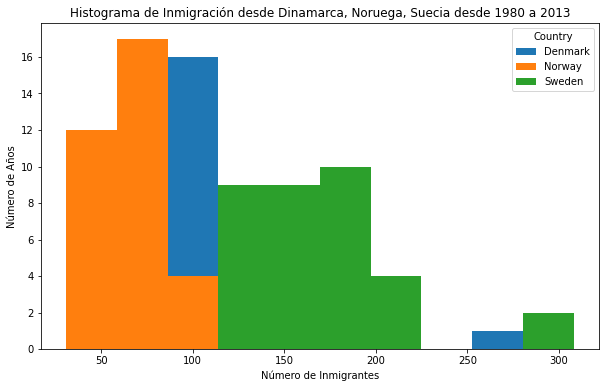

In [48]:
# generar el histograma
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

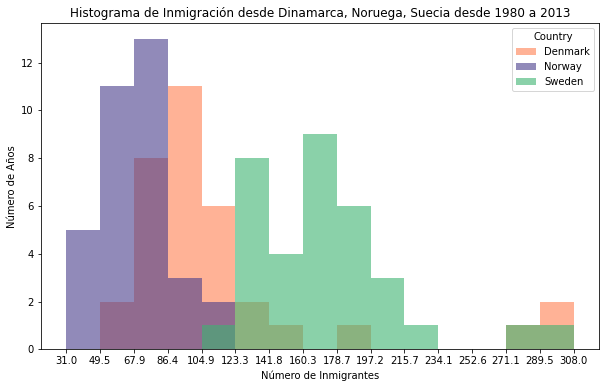

In [49]:
# obtener los valores de marcas del eje x
contador, bordes_contenedores = np.histogram(df_t, 15)

# histograma no apilado
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bordes_contenedores,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

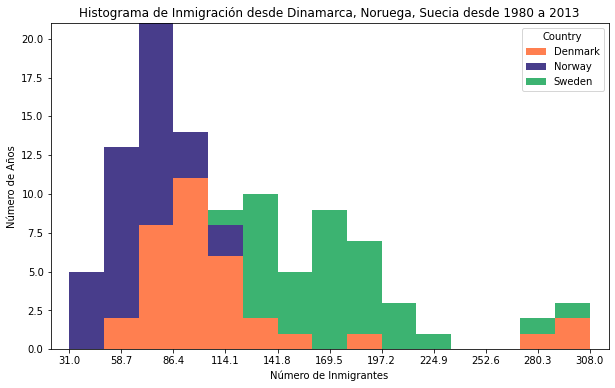

In [50]:
contador, bordes_contenedores = np.histogram(df_t, 10)
xmin = bordes_contenedores[0] - 10   #  el valor del primer contenedor es 31.0, se descuenta un búfer de 10 por motivos estéticos 
xmax = bordes_contenedores[-1] + 10  #  el último valor del contenedor es 308.0, se agrega un búfer de 10 por motivos estéticos

# Histograma apilable
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bordes_contenedores,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

# Gráfico de Barras <a id="10"></a>


**Se empezará analizando el efecto de la crisis financiera de Islandia:**

La crisis financiera islandesa de 2008 - 2011 fue un evento económico y político importante en Islandia. En relación con el tamaño de su economía, el colapso bancario sistémico de Islandia fue el mayor experimentado por cualquier país en la historia económica. La crisis condujo a una grave depresión económica entre 2008 y 2011 ya un importante malestar político.

**Pregunta:** Comparar el número de inmigrantes islandeses (country = 'Iceland') en Canadá desde el año 1980 hasta el 2013.


In [51]:
# paso 1: obtener los datos
df_islandia = df_can.loc['Iceland', years]
df_islandia.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

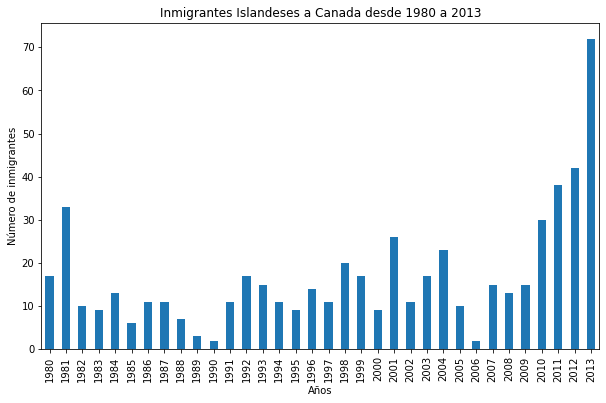

In [52]:
# paso 2: graficar los datos
df_islandia.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

El gráfico de barras de arriba muestra el número total de inmigrantes desglosados ​​por cada año. Podemos ver claramente el impacto de la crisis financiera; el número de inmigrantes a Canadá comenzó a aumentar rápidamente después de 2008.

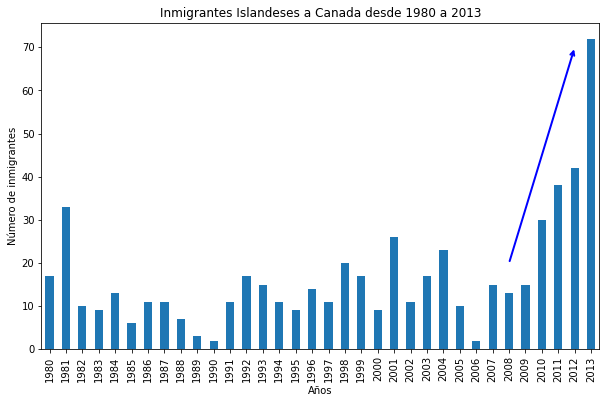

In [53]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90)  # rota las marcas del eje x (puntos etiquetados en el eje x) en 90 grados

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

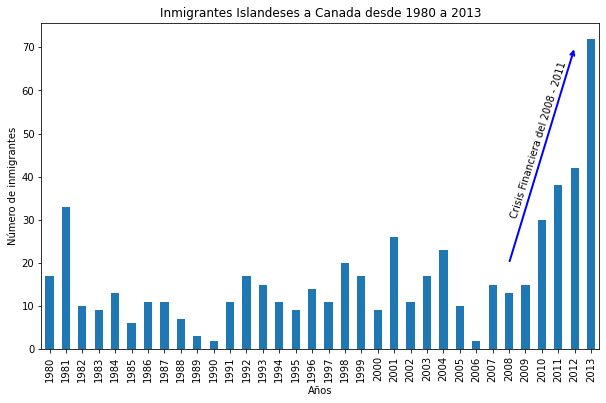

In [54]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Texto de la anotación
plt.annotate('Crisis Financiera del 2008 - 2011',  # texto a mostrar
             xy=(28, 30),  # comienzo del texto en el punto (año 2008 , pobla 30)
             rotation=72.5,  # Basado en la técnica de prueba y error para calzar con la flecha
             va='bottom',  # alineación vertical
             ha='left',  # alineación horizontal
             )

plt.show()

In [55]:
#f_islandia.plot(kind='bar', figsize=(10, 6), rot=90)

#plt.xlabel('Años')
#plt.ylabel('Número de inmigrantes')f_islandia.plot(kind='bar', figsize=(10, 6), rot=90)

#plt.xlabel('Años')
#plt.ylabel('Número de inmigrantes')
df_arg = df_can.loc['Argentina', years]
df_arg.head(195)



1980     368
1981     426
1982     626
1983     241
1984     237
1985     196
1986     213
1987     519
1988     374
1989     538
1990     678
1991     763
1992    1023
1993    1022
1994     366
1995     380
1996     396
1997     391
1998     349
1999     318
2000     427
2001     635
2002     865
2003    1745
2004    1591
2005    1153
2006     847
2007     620
2008     540
2009     467
2010     459
2011     278
2012     263
2013     282
Name: Argentina, dtype: object

<AxesSubplot:xlabel='Argentina', ylabel='Count'>

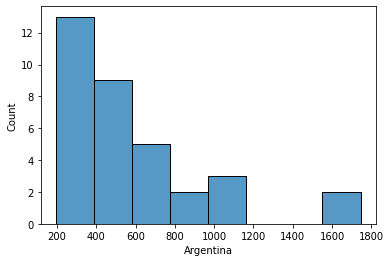

In [56]:
sns.histplot(data=df_arg)

<center> <h2> Crisis económica en Argentina entre 2001-2005 </center></h2>

Apartir del 2006 empieza a disminuir la inmigración producto de la estabilidad económica en ese país.

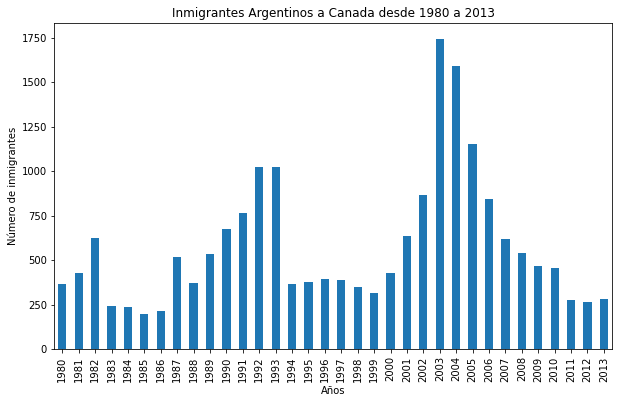

In [57]:
#ax=sns.countplot(x="years", hue="smoker", data= df_arg)
df_arg.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Argentinos a Canada desde 1980 a 2013') # agrega al gráfico el título
             
plt.show()

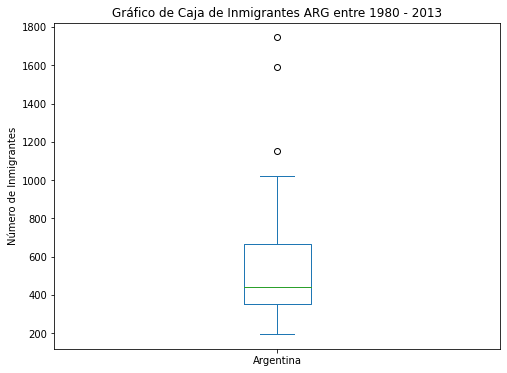

In [58]:
df_arg.plot(kind='box', figsize=(8, 6))

plt.title('Gráfico de Caja de Inmigrantes ARG entre 1980 - 2013')
plt.ylabel('Número de Inmigrantes')

plt.show()

In [59]:
 df_arg

1980     368
1981     426
1982     626
1983     241
1984     237
1985     196
1986     213
1987     519
1988     374
1989     538
1990     678
1991     763
1992    1023
1993    1022
1994     366
1995     380
1996     396
1997     391
1998     349
1999     318
2000     427
2001     635
2002     865
2003    1745
2004    1591
2005    1153
2006     847
2007     620
2008     540
2009     467
2010     459
2011     278
2012     263
2013     282
Name: Argentina, dtype: object

In [60]:
#usar el metodo sum() para obtener el total por año
df_total= pd.DataFrame(df_can[years].sum(axis=0))
df_total

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [61]:
#cambiar los años al tipo entero
df_total.index=map(int, df_total.index)
#restablecer el indice,volver a colocarlo como una columna en el dataframe df_total
df_total.reset_index(inplace = True)
#renombrar columnas 
df_total. columns= ["year","total"]
df_total

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


In [62]:
import statsmodels as sm
import statsmodels.formula.api as smf

<function matplotlib.pyplot.show(close=None, block=None)>

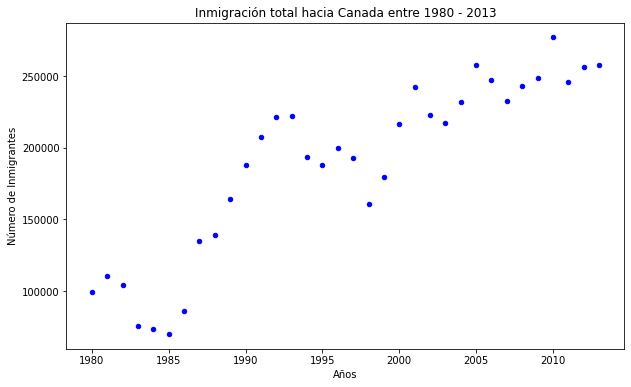

In [63]:
df_total.plot(kind= "scatter", x= "year", y="total", figsize=(10,6), color="blue")
plt.title("Inmigración total hacia Canada entre 1980 - 2013")
plt.xlabel("Años")
plt.ylabel("Número de Inmigrantes")
plt.show

<h2>Regresión Lineal</h2>

In [64]:
model1= "year~total"
lm1 = smf.ols(formula =model1, data = df_total).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     131.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           7.10e-13
Time:                        15:27:28   Log-Likelihood:                -98.141
No. Observations:                  34   AIC:                             200.3
Df Residuals:                      32   BIC:                             203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1969.2617      2.495    789.284      0.0

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
predictors = ["year"]
x = df_total[predictors]
y= df_total["total"]

lm= LinearRegression()
model= lm.fit(x,y)

In [67]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -10926195.245378148
betas = [5567.09228419]


In [68]:
model.predict(x)

array([ 96647.47731093, 102214.56959511, 107781.6618793 , 113348.75416348,
       118915.84644767, 124482.93873186, 130050.03101604, 135617.12330023,
       141184.21558442, 146751.3078686 , 152318.40015279, 157885.49243698,
       163452.58472116, 169019.67700535, 174586.76928953, 180153.86157372,
       185720.95385791, 191288.04614209, 196855.13842628, 202422.23071047,
       207989.32299465, 213556.41527884, 219123.50756302, 224690.59984721,
       230257.6921314 , 235824.78441558, 241391.87669977, 246958.96898396,
       252526.06126814, 258093.15355233, 263660.24583652, 269227.3381207 ,
       274794.43040489, 280361.52268908])

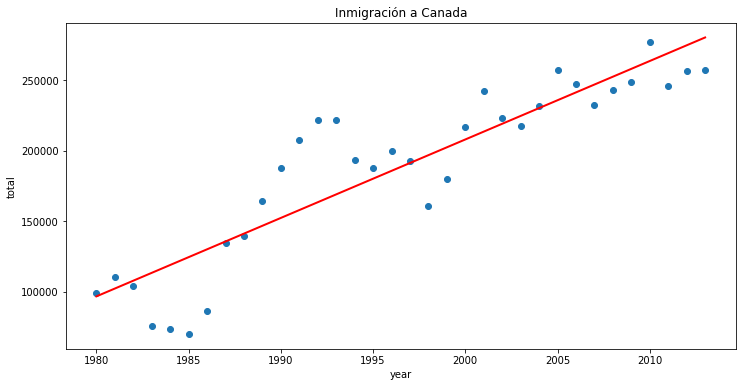

In [69]:
total_pred= model.predict(x)

plt.figure(figsize=(12,6))
plt.plot(df_total["year"],df_total["total"], 'o')
plt.plot(df_total["year"],total_pred,'r', linewidth=2)
plt.xlabel("year")
plt.ylabel("total")
plt.title("Inmigración a Canada")

plt.show()

In [70]:
x = df_total['year']      # año en el eje x
y = df_total['total']     # total en el eje y
ajuste = np.polyfit(x, y, deg=1)

ajuste

array([ 5.56709228e+03, -1.09261952e+07])

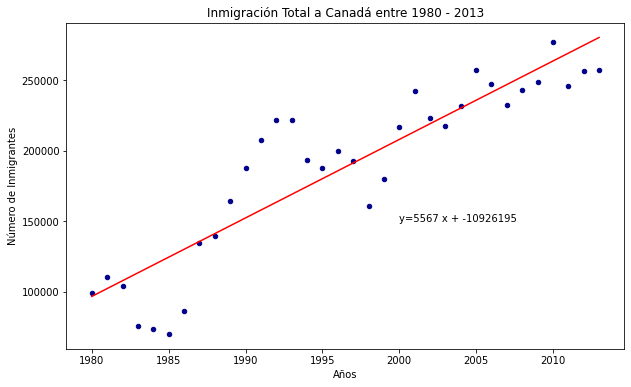

'Número de Inmigrantes = 5567 * Año + -10926195'

In [71]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Inmigración Total a Canadá entre 1980 - 2013')
plt.xlabel('Años')
plt.ylabel('Número de Inmigrantes')

# trazar la línea del mejor ajuste
plt.plot(x, ajuste[0] * x + ajuste[1], color='red') # recordar que x son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(ajuste[0], ajuste[1]), xy=(2000, 150000))

plt.show()
'Número de Inmigrantes = {0:.0f} * Año + {1:.0f}'.format(ajuste[0], ajuste[1]) 



<p> Al usar la ecuación de recta de mejor ajuste, se puede estimar el número de inmigrantes en 2015:

```python
Nº Inmigrantes = 5567 * Año - 10926195
Nº Inmigrantes = 5567 * 2015 - 10926195
Nº Inmigrantes = 291.310
```

En comparación con el informe anual de 2016 de Citizenship and Immigration Canada (CIC) (https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/annual-report-parliament-immigration-2016.html), se puede ver observar que Canadá aceptó 271.845 inmigrantes en 2015, que es bastante bueno. El valor estimado de 291,310 está dentro del 7% del número real, lo cual es bastante bueno considerando que nuestros datos originales provienen de las Naciones Unidas (y pueden diferir ligeramente de los datos de CIC).</p>


In [72]:
df_continentes = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))
df_continentes.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Cod_continet,REG,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,716952
Asia,45815,109147,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3472756
Europe,39044,39754,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1489745
Latin America and the Caribbean,29832,30395,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,825375
Northern America,1810,1810,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,244762


In [73]:
for i in df_continentes.columns:
    print(df_continentes[i].tolist)
    


<bound method IndexOpsMixin.tolist of Continent
Africa                             48762
Asia                               45815
Europe                             39044
Latin America and the Caribbean    29832
Northern America                    1810
Oceania                            12726
Name: Cod_continet, dtype: int64>
<bound method IndexOpsMixin.tolist of Continent
Africa                              49242
Asia                               109147
Europe                              39754
Latin America and the Caribbean     30395
Northern America                     1810
Oceania                             13210
Name: REG, dtype: int64>
<bound method IndexOpsMixin.tolist of Continent
Africa                              3951
Asia                               31025
Europe                             39760
Latin America and the Caribbean    13081
Northern America                    9378
Oceania                             1942
Name: 1980, dtype: int64>
<bound method IndexOpsMixin

In [74]:

df_americalatina = df_continentes.iloc[3]
df_americalatina
df_americalatina.drop(["Total"],axis=0, inplace=True)
df_americalatina

Cod_continet    29832
REG             30395
1980            13081
1981            15215
1982            16769
1983            15427
1984            13678
1985            15171
1986            21179
1987            28471
1988            21924
1989            25060
1990            27942
1991            36827
1992            37853
1993            33840
1994            21341
1995            20262
1996            18645
1997            17174
1998            13830
1999            15088
2000            16898
2001            20067
2002            19317
2003            20263
2004            22181
2005            24747
2006            24676
2007            26011
2008            26547
2009            26867
2010            28818
2011            27856
2012            27173
2013            24950
Name: Latin America and the Caribbean, dtype: int64